Import the libraries you are going to use. In most cases, we will use these libraries.

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

Specify the location from where you loading your file.

In [9]:
data = pd.read_excel('book_rank_data.xlsx')
data.head()

,DATE,ISBN,Title,Weekly Sales,Weekly Average Rank
0,37002.0,'0596000405,Java Servlet Programming (2nd Edition),227,238.0
1,37002.0,'0596000278,Java Servlet Programming (2nd Edition),269,258.0
2,37002.0,'1565922840,Programming Perl (3rd Edition),135,388.0
3,37002.0,'1565923928,Developing Bioinformatics Computer Skills,481,401.5
4,37002.0,'1565924274,Programming Perl (3rd Edition),145,408.0


In [10]:
data.shape[0]

861

Convert into Log forms.

In [11]:
data['Lnrank'] = np.log(data['Weekly Average Rank'])
data['Lnsales'] = np.log(data['Weekly Sales'])
data.head()

,DATE,ISBN,Title,Weekly Sales,Weekly Average Rank,Lnrank,Lnsales
0,37002.0,'0596000405,Java Servlet Programming (2nd Edition),227,238.0,5.472271,5.424950
1,37002.0,'0596000278,Java Servlet Programming (2nd Edition),269,258.0,5.552960,5.594711
2,37002.0,'1565922840,Programming Perl (3rd Edition),135,388.0,5.961005,4.905275
3,37002.0,'1565923928,Developing Bioinformatics Computer Skills,481,401.5,5.995208,6.175867
4,37002.0,'1565924274,Programming Perl (3rd Edition),145,408.0,6.011267,4.976734


plot the log of sales and rank

<AxesSubplot:xlabel='Lnrank', ylabel='Lnsales'>

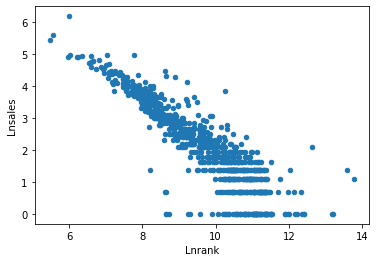

In [12]:
data.plot('Lnrank', 'Lnsales', 'scatter')

plot the histogram

array([[<AxesSubplot:title={'center':'Weekly Sales'}>]], dtype=object)

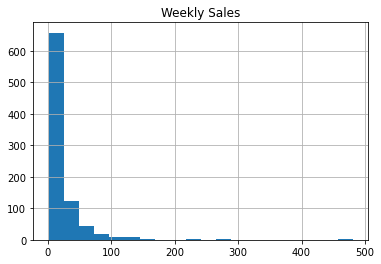

In [13]:
data.hist('Weekly Sales', bins=20)

Run an OLS with Lnsales (Y) as dependent variable and Lnrank (X) as independent variable. We have to make sure we specify the intercept.We do that create adding column on constant to our independent variable X.

In [16]:
X = data.Lnrank
Y = data.Lnsales
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()

C:\Users\rston\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lnsales   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     3454.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          3.03e-303
Time:                        22:38:12   Log-Likelihood:                -738.13
No. Observations:                 861   AIC:                             1480.
Df Residuals:                     859   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5260      0.143     73.374      0.000      10.244      10.808
Lnrank        -0.8712      0.015    -58.774      0.000      -0.900      -0.842
==============================================================================
Omnibus:                      176.859   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1142.401
Skew:                          -0.762   Prob(JB):                    8.53e-249
Kurtosis:                       8.433   Cond. No.                         72.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""